In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pylab import mpl, plt
import time

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

pd.set_option('display.max_columns',110)
pd.set_option('display.max_rows',1000)
mpl.rcParams['font.family'] = 'serif'

#import all of the equity price data from csv from Sharadar or you can access your own price data
equity_prices = pd.read_csv('Equity Prices')
#get ticker meta data
tickers_df = pd.read_csv('Equity Tickers', low_memory=False)    

#filter out companies not based in USA
tickers_df1 = tickers_df[tickers_df['location'].notnull()]
tickers_df1 = tickers_df1[tickers_df1['location'].str.contains("U.S.")]

#select needed columns to filter out sector
tickers_df1 = tickers_df1[['ticker','sector','name','industry','scalemarketcap']]

#create set and list of all tickers
myset_ticker = set(tickers_df1.ticker)
list_tickers = list(myset_ticker)

#if you want to sort out certain market cap size for liquidity
sector_stocks = tickers_df1[(tickers_df1['scalemarketcap'] == '3 - Small') | \
                (tickers_df1['scalemarketcap'] == '4 - Medium') | \
                (tickers_df1['scalemarketcap'] == '5 - Large') | \
                (tickers_df1['scalemarketcap'] == '6 - Mega')]

#put tickers to list from sector specified
sector_tickers = sector_stocks['ticker'].tolist()
len(sector_tickers)

In [6]:
Random_Stocks = np.random.choice(sector_tickers, size = 500, replace = False)

#sort out Sector Prices
Sector_stock_prices = equity_prices.loc  \
    [equity_prices['ticker'].isin(Random_Stocks)]

Sector_stock_prices.head()

#filter the price date by the list of tickers
#Sector_stock_prices = Sector_stock_prices.loc[Sector_stock_prices['ticker'].isin(Sector_stocks_cheapest_tickers)]
  
#get date, ticker, and close(adjusted) columns
Sector_stock_prices_1 = Sector_stock_prices.iloc[:,[0,1,5]]

Sector_stock_prices_2 = Sector_stock_prices_1.pivot(index='date', columns='ticker', values='close')
Sector_stock_prices_3 = Sector_stock_prices_2.fillna(0)

Sector_stock_prices_3.head()

ticker,AACE,AAII,ABCD,ABCW,ABTX,ACET,ACME,ACVC,ADSK,AEA,AEC,AES,AFS.A,AGCCQ,AGIXQ,AHH,AIPC,ALAB,ALDW,ALGO,ALNT,AME,AMIS,AMMB,AMN1,AMRN1,ANCR,AOS,APEX1,APOG,APRE,APWR1,ARAY,ARCL,ARDT,ART1,ARXT,AS,AST,ASTX1,ATAC1,ATKR,ATRN,AVDO,AWK,BCOR,BCRX,BDT1,BEV,BHLB,BKR1,BKUNQ,BMC,BMRN,BNE,...,TSY,TUMI,TWTR,TXM,TYL,TZOO,UAL,UBH,UBID,UEIC,ULUR,UNP,UPUP,URX,USSPQ,USW,UTCI,VAS,VC1,VCEL,VEC,VIAD,VL,VLNK,VNBCQ,VNRRQ,VNUS,VOCS,VRGE,VRSO,VRTU,VYSI,W,WAMUQ,WCG1,WFC,WINK,WINMQ,WJCO,WLBA,WLFC,WLK,WLSC,WM,WOMN1,WORK1,WPZ,WSBF,XBIT,XMCM,XOMA,XOMD,XRAY,XRX,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-12-31,11.375,11.000,0.0,0.0,0.0,4.049,0.0,6.250,9.250,0.0,23.75,23.315,35.594,0.0,0.0,0.0,25.000,26.375,0.0,30.00,31.375,4.000,0.0,151.250,30.374,28.000,4.313,4.694,14.750,11.88,0.0,0.0,0.0,0.0,8.000,24.375,0.0,4.938,0.0,11.250,18.125,0.0,541.176,13.125,0.0,0.0,7.000,18.250,13.000,0.0,9.750,15.375,32.813,0.0,19.338,...,23.938,0.0,0.0,13.938,5.50,0.0,0.0,17.423,0.0,5.000,0.0,15.658,12.833,0.0,0.0,45.125,3.156,0.0,0.0,700.00,0.0,0.0,0.0,0.875,2.214,0.0,0.0,0.0,0.0,23.750,0.0,0.0,0.0,28.361,0.0,19.375,0.0,0.0,39.000,0.0,17.50,0.0,0.0,39.21,0.0,0.0,0.0,0.0,0.0,0.0,1668.9,16.000,10.167,147.76,0.0
1998-01-02,11.250,11.500,0.0,0.0,0.0,4.174,0.0,6.375,9.375,0.0,24.00,22.655,35.313,0.0,0.0,0.0,24.938,26.500,0.0,29.00,30.750,3.917,0.0,147.500,29.924,27.125,5.313,4.764,14.521,11.88,0.0,0.0,0.0,0.0,7.875,23.750,0.0,5.000,0.0,11.500,18.625,0.0,487.059,13.000,0.0,0.0,7.125,18.500,13.063,0.0,10.000,15.375,32.469,0.0,18.977,...,23.938,0.0,0.0,14.125,5.69,0.0,0.0,17.593,0.0,5.000,0.0,15.563,12.583,0.0,0.0,46.125,3.125,0.0,0.0,760.00,0.0,0.0,0.0,0.875,2.214,0.0,0.0,0.0,0.0,24.375,0.0,0.0,0.0,28.944,0.0,19.095,0.0,0.0,38.250,0.0,17.63,0.0,0.0,38.71,0.0,0.0,0.0,0.0,0.0,0.0,1706.4,16.000,9.917,149.76,0.0
1998-01-05,11.375,11.375,0.0,0.0,0.0,4.296,0.0,6.563,9.563,0.0,24.06,23.000,35.594,0.0,0.0,0.0,25.125,26.250,0.0,28.00,32.563,3.908,0.0,145.000,29.594,27.000,5.125,4.736,16.104,12.00,0.0,0.0,0.0,0.0,7.875,23.250,0.0,5.000,0.0,10.500,21.000,0.0,487.059,13.000,0.0,0.0,7.125,18.313,13.625,0.0,10.500,15.250,31.844,0.0,19.037,...,24.000,0.0,0.0,14.875,5.50,0.0,0.0,17.678,0.0,5.000,0.0,15.578,12.583,0.0,0.0,45.375,3.094,0.0,0.0,780.00,0.0,0.0,0.0,0.875,2.214,0.0,0.0,0.0,0.0,28.750,0.0,0.0,0.0,28.778,0.0,18.905,0.0,0.0,38.000,0.0,17.38,0.0,0.0,38.34,0.0,0.0,0.0,0.0,0.0,0.0,1762.5,15.333,9.543,151.88,0.0
1998-01-06,11.625,11.333,0.0,0.0,0.0,4.148,0.0,6.500,9.845,0.0,23.88,22.875,35.344,0.0,0.0,0.0,25.063,26.875,0.0,28.75,31.750,4.000,0.0,136.875,29.203,27.125,5.750,4.716,16.583,12.00,0.0,0.0,0.0,0.0,7.688,23.188,0.0,4.813,0.0,10.750,20.000,0.0,493.824,12.750,0.0,0.0,7.625,18.438,13.375,0.0,10.375,15.125,31.938,0.0,18.766,...,23.875,0.0,0.0,15.000,5.62,0.0,0.0,16.318,0.0,4.938,0.0,15.422,12.167,0.0,0.0,45.563,3.063,0.0,0.0,790.08,0.0,0.0,0.0,0.875,2.214,0.0,0.0,0.0,0.0,29.375,0.0,0.0,0.0,27.972,0.0,18.720,0.0,0.0,37.750,0.0,17.63,0.0,0.0,38.78,0.0,0.0,0.0,0.0,0.0,0.0,1762.5,15.333,9.710,150.62,0.0
1998-01-07,10.875,11.417,0.0,0.0,0.0,4.148,0.0,6.500,9.500,0.0,24.00,23.125,35.750,0.0,0.0,0.0,24.875,26.875,0.0,28.25,29.750,3.889,0.0,131.250,28.693,27.063,5.625,4.680,16.333,12.03,0.0,0.0,0.0,0.0,7.875,22.313,0.0,4.750,0.0,11.125,19.500,0.0,493.824,11.938,0.0,0.0,8.438,18.563,13.250,0.0,10.188,14.750,30.656,0.0,18.555,...,24.125,0.0,0.0,15.063,5.62,0.0,0.0,17.338,0.0,5.065,0.0,15.845,12.000,0.0,0.0,46.438,3.000,0.0,0.0,820.00,0.0,0.0,0.0,0.906,2.699,0.0,0.0,0.0,0.0,28.125,0.0,0.0,0.0,27.222,0.0,18.405,0.0,0.0,37.563,0.0,18.25,0.0,0.0,38.53,0.0,0.0,0.0,0.0,0.0,0.0,1687.5,15.833,9.543,145.38,0.0


In [3]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [6, 5] #set size of graph in inches
plt.style.use('seaborn-poster')

In [8]:
Sector_stock_prices_3.shape

(5558, 486)

In [ ]:
'''
Backtest a strategy (simple trend following)
1. Buy when at 52 week high
5. Sell on 52 week low
'''

##############Using One Symbol#############################

symbol = 'AEA'

data = pd.DataFrame(Sector_stock_prices_3[symbol])
data.dropna(inplace = True)
data['Returns'] = data[symbol].pct_change()
data.dropna(inplace = True)


data['52 week high'] = data[symbol].rolling(252).max()
data['52 week low'] = data[symbol].rolling(252).min()

data.dropna(inplace = True)

data['Signal'] = ''
data.iloc[0,4] = 'Flat'

for i in range(1, len(data)):
    data.iloc[i, 4] = np.where(data.iloc[i,0] > data.iloc[i-1,2], 'Long',\
             np.where(data.iloc[i,0] < data.iloc[i-1,3], 'Sell', \
             np.where(data.iloc[i-1,4] == 'Long', 'Long','Flat')))

data['Position'] = np.where(data['Signal'] == 'Long',1,0)
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.dropna(inplace = True)
D = len(data)
perf = data[['Returns', 'Strategy']].add(1).prod() ** (252 / D) - 1 

#1. Compute the buy and hold returns
print("Buy and hold returns annualized " + str(round(perf[0], 4)))

#2. Compute the strategy returns and compare it with the buy and hold returns
print("strategy returns annualized " + str(round(perf[1], 4)) + \
      " resulting in outperformance of " + str(round(perf[1]-perf[0], 4)))

#3. Plot buy and hold returns and strategy returns in a single chart
portfolio_index = (1 + data[['Strategy','Returns']]).cumprod()
portfolio_index.plot()

#4. Compute the Sharpe ratio
std = data[['Returns', 'Strategy']].std() * 252 ** 0.5
Sharpe = perf/std
print("The Strategy Sharpe Ratio is " + str(round(Sharpe[1], 4)))
print("The Buy and Hold Sharpe Ratio is " + str(round(Sharpe[0], 4)))

#5. Compute and plot the drawdown of the strategy
def Max_Drawdown_Chart(x):
    # We are going to use a trailing 252 trading day window
    Roll_Max = x.expanding().max()
    Daily_Drawdown = x/Roll_Max - 1.0
    # Next we calculate the minimum (negative) daily drawdown in that window.
    # Again, use min_periods=1 if you want to allow the expanding window
    Max_Daily_Drawdown = Daily_Drawdown.expanding().min()
    # Plot the results
    Daily_Drawdown.plot()
    Max_Daily_Drawdown.plot()
    
def Max_Drawdown(x):
    Roll_Max = x.expanding().max()
    Daily_Drawdown = x/Roll_Max - 1.0
    return Daily_Drawdown.min()

Max Drawdown is -0.3322148736275289


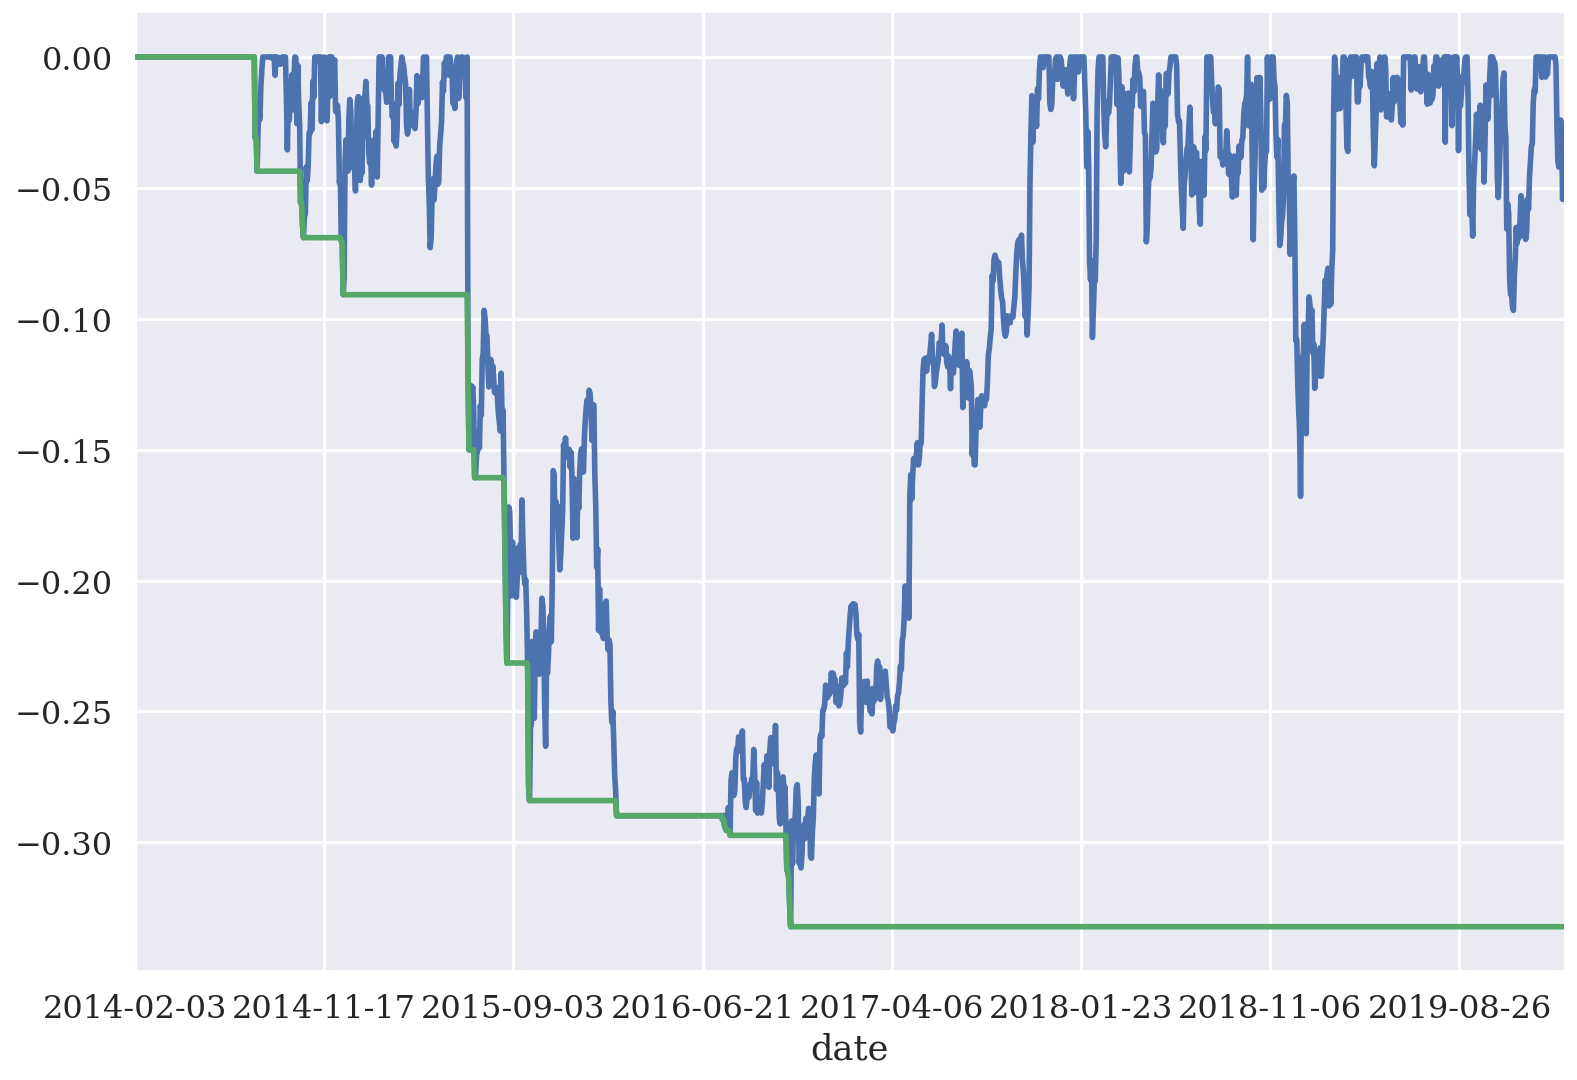

In [38]:
Max_Drawdown_Chart(portfolio_index['Strategy'])
print("Max Drawdown is " + str(Max_Drawdown(portfolio_index['Strategy'])))

In [11]:
##############Run Through Different Stocks#################################
t0 = time.time()

tickers_index = Sector_stock_prices_3.columns
ticker_list = tickers_index.tolist()
number_stocks = Sector_stock_prices_3.shape[1]
dayhigh = 252


results = pd.DataFrame()
for symbol in ticker_list:
   data = pd.DataFrame(Sector_stock_prices_3[symbol])
   data.dropna(inplace = True)
   data['Returns'] = data.pct_change()
   data.dropna(inplace = True)
   data['52 week high'] = data[symbol].rolling(dayhigh).max()
   data['52 week low'] = data[symbol].rolling(dayhigh).min()
   data.dropna(inplace = True)
   data['Signal'] = ''
   if data.empty == True: #some stocks don't have 252 days of data and can be dropped
       pass
   else:
       data.iloc[0,4] = 'Flat'
       for i in range(1, len(data)):
           data.iloc[i, 4] = np.where(data.iloc[i,0] > data.iloc[i-1,2], 'Long',\
             np.where(data.iloc[i,0] < data.iloc[i-1,3], 'Sell', \
             np.where(data.iloc[i-1,4] == 'Long', 'Long','Flat')))
       data['Position'] = np.where(data['Signal'] == 'Long',1,0)
       data['Strategy'] = data['Position'].shift(1) * data['Returns']
       data.dropna(inplace = True)
       Days = len(data)
       perf = data[['Returns', 'Strategy']].add(1).prod() ** (252 / Days) - 1
       portfolio_index = (1 + data[['Returns','Strategy']]).cumprod()
       Max_DD = Max_Drawdown(portfolio_index)
       std = data[['Returns', 'Strategy']].std() * 252 ** 0.5
       Sharpe = perf/std
       results = results.append(pd.DataFrame(
                {'Symbol': symbol,
                 'MARKET Returns': perf['Returns'],
                 'STRATEGY Returns': perf['Strategy'],
                 'Market Sharpe': Sharpe[0],
                 'Strategy Sharpe': Sharpe[1],
                 'Market Max DD': Max_DD[0],
                 'Strategy Max DD': Max_DD[1],
                 'Sharpe OUT': Sharpe['Strategy'] - Sharpe['Returns'],
                 'Strategy Alpha': perf['Strategy'] - perf['Returns']},
                 index = [0]), ignore_index = True)

t1 = time.time()

total = t1-t0
print('It took ' + str(np.round(total/60,2)) + ' minutes to run the code')

It took 17.01 minutes to run the code


In [37]:
results.sort_values('Sharpe OUT', ascending = False).head(20)
results.head(10)

,Symbol,MARKET Returns,STRATEGY Returns,Market Sharpe,Strategy Sharpe,Market Max DD,Strategy Max DD,Sharpe OUT,Strategy Alpha
0,AACE,-1.000000,-1.000000,-1.841229,-2.223837,-1.000000,-1.000000,-0.382608,0.000000
1,AAII,-1.000000,-0.223149,-0.747362,-0.426274,-1.000000,-0.876610,0.321088,0.776851
2,ABCD,-1.000000,-1.000000,-1.470167,-1.846307,-1.000000,-1.000000,-0.376140,0.000000
3,ABCW,-1.000000,-1.000000,-0.714041,-0.717071,-1.000000,-1.000000,-0.003030,0.000000
4,ABTX,0.105020,0.043618,0.423443,0.230944,-0.356579,-0.226974,-0.192500,-0.061401
5,ACET,-1.000000,0.035744,-1.551532,0.107261,-1.000000,-0.714150,1.658794,1.035744
6,ACME,-1.000000,-1.000000,-0.772346,-1.493771,-1.000000,-1.000000,-0.721425,0.000000
7,ACVC,-1.000000,-1.000000,-0.852294,-0.889075,-1.000000,-1.000000,-0.036781,0.000000
8,ADSK,0.149169,0.067901,0.350604,0.215615,-0.769201,-0.636662,-0.134989,-0.081268
9,AEA,-1.000000,-1.000000,-1.261436,-1.899980,-1.000000,-1.000000,-0.638544,0.000000


Text(0.5, 1.0, 'Strategy Relative Sharpe Random Stocks Trend Strategy')

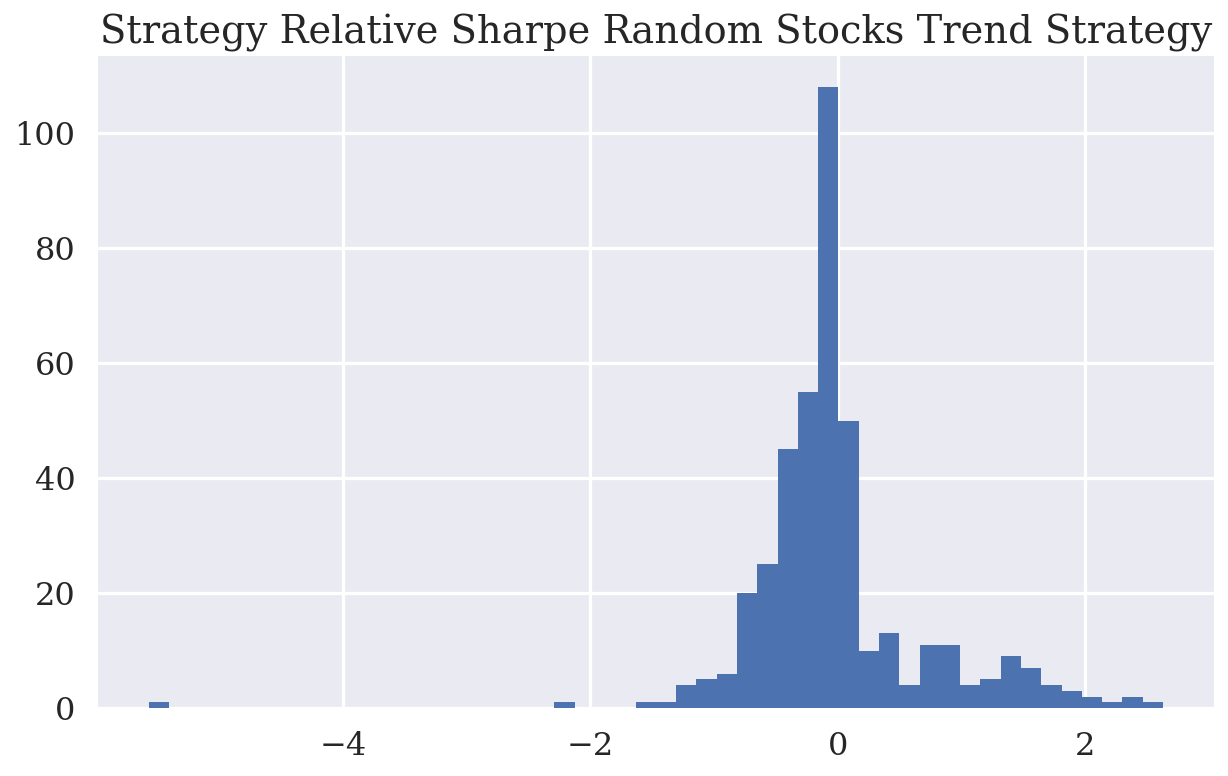

In [19]:
plt.figure(figsize=[10,6])
n, bins, patches = pyplot.hist(results['Sharpe OUT'], bins = 50, rwidth = 3)
plt.title('Strategy Relative Sharpe Random Stocks Trend Strategy')

Text(0.5, 1.0, 'Strategy Alpha Sharpe Random Stocks Trend Strategy')

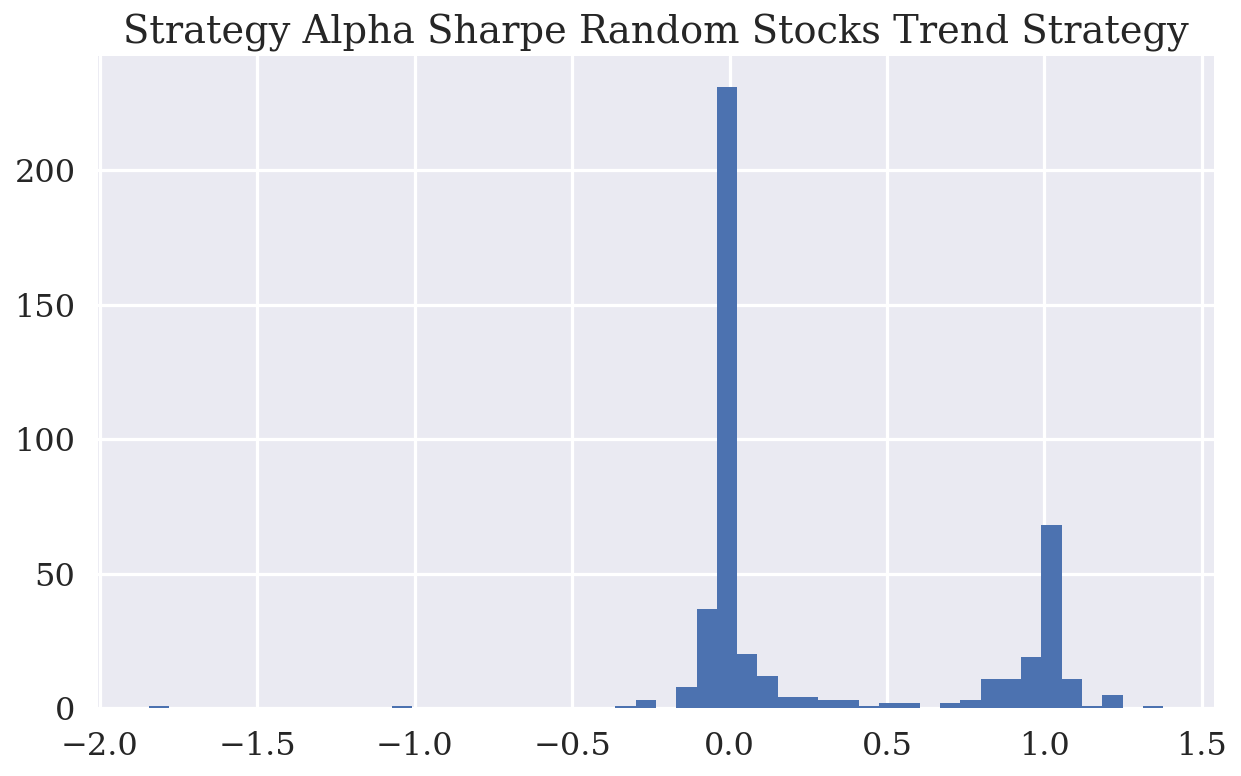

In [18]:
plt.figure(figsize=[10,6])
n, bins, patches = pyplot.hist(results['Strategy Alpha'], bins = 50, rwidth = 3)
plt.title('Strategy Alpha Sharpe Random Stocks Trend Strategy')

Text(0.5, 1.0, 'Max Drawdown of Random Stocks Trend Strategy')

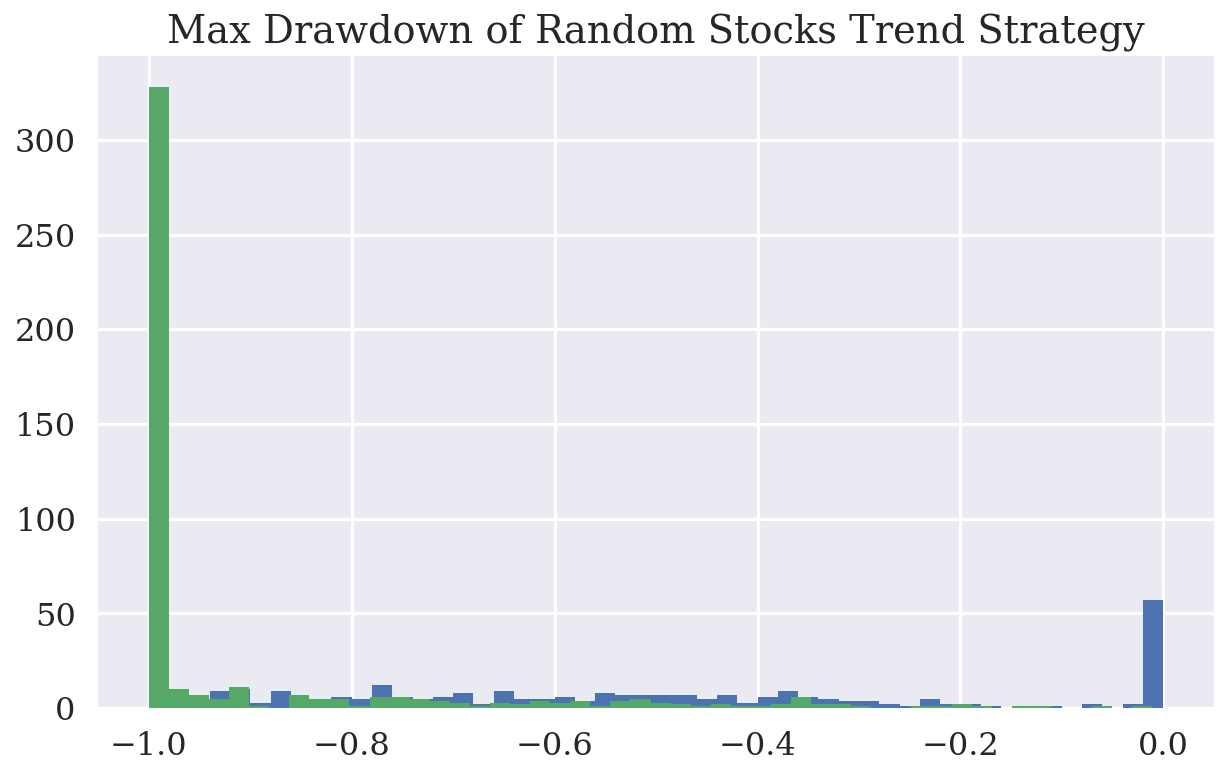

In [22]:
plt.figure(figsize=[10,6])
n, bins, patches = pyplot.hist(results['Strategy Max DD'], bins = 50, rwidth = 3)
n, bins, patches = pyplot.hist(results['Market Max DD'], bins = 50, rwidth = 3)
plt.title('Max Drawdown of Random Stocks Trend Strategy')

In [33]:
print(results['Strategy Alpha'].median())
print(results['Strategy Alpha'].mean())
print(results['MARKET Returns'].median())
print(results['STRATEGY Returns'].median())
print(results['Sharpe OUT'].median())


0.0
0.2799862702485402
-1.0
-0.06667085580841581
-0.07130489322797695


In [35]:
from scipy import stats
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(results['STRATEGY Returns'],results['MARKET Returns'])
print("t = " + str(t2))
print("p = " + str(p2/2)) #one sided t test

print('The Strategy Alpha is significant at the ' + str(round(p2/2, 6)) + ' level.')

t = 8.55101408627195
p = 2.4901874405001317e-17
The Strategy Alpha is significant at the 0.0 level.


In [36]:
sharpe_results = results[['Strategy Sharpe','Market Sharpe']].dropna()
t3, p3 = stats.ttest_ind(sharpe_results['Strategy Sharpe'],sharpe_results['Market Sharpe'])
print("t = " + str(t3))
print("p = " + str(p3/2)) #one sided t test

print('The Strategy Sharpe is significant at the ' + str(round(p3/2, 6)) + ' level.')

t = 0.0046263701545186655
p = 0.498154917301623
The Strategy Sharpe is significant at the 0.498155 level.
